<div class="licence">
<span>Licence CC BY-NC-ND</span>
<span>Valérie Roy</span>
</div>

<img src="media/ensmp-25-alpha.png" />

# masques et tableaux booléens

ou comment tester en même temps *tous les éléments d'un tableau*

Nous avons vu les fonctions vectorisées (qui s'appliquent à tout un tableau sans recours à une boucle for-Python). Nous avons aussi vu les fonctions qui aggrègent les valeurs suivant les axes des `np.ndarray` et permettent par exemple de sommer les lignes ou les colonnes d'une matrice ou encore trouver le plus petit élément ou son index dans la `np.ndarray`.

Nous allons voir une dernière chose qui consiste à tester tous les éléments d'un `np.ndarray` (ou bien sûr d'une slice d'un `np.ndarray`).

Il y a deux manières de tester:
   - tester tous les éléments et combiner les résultats des tests unitaires en un seul résultat global (le nombre de valeurs paires de votre tableau)
   - obtenir le `np.ndarray` de booléens résultats des tests individuels (les éléments qui sont pairs)

Nous allons voir rapidement ces deux manières de tester.

In [1]:
import numpy as np

## appliquons une condition à un `np.ndarray`

Les conditions s'appliquent à tous les éléments d'un tableau en une seule fois, ce qui signifie que vous ne devez pas écrire de boucle en Python mais laisser les fonctions vectorisées le faire pour vous.

Les opérateurs de comparaison sont des fonctions vectorisées (les fameuses *UFuncs*). Elles vont retourner un tableau contenant les résultats des comparaisons éléments-par-élément.
   
Ce tableau est un *masque booléen* que vous pouvez ensuite utiliser pour filtrer les éléments de votre tableau pour, par exemple, ne garder que ceux pour lesquels la condition est vraie.

On va faire tout de suite un exemple. Construisons une matrice de forme `(3 x 4)` qui contient des entiers générés aléatoirement entre `-10` et `10`.

Vous rappelez-vous comment faire une telle matrice ? Essayer avec `np.random.randint` et `reshape`:

In [2]:
# votre code ici - la correction ci-dessous

In [3]:
a = np.random.randint(-10, 10, 12).reshape(3, 4)
a

array([[ -3,  -5, -10,  -5],
       [  9,   8,   1,   1],
       [ -8,  -2,  -9,  -1]])

Testons la parité des élements (avec le modulo `%`).

In [4]:
a%2

array([[1, 1, 0, 1],
       [1, 0, 1, 1],
       [0, 0, 1, 1]])

Comparons les résultats à `0`:

In [5]:
a%2 == 0

array([[False, False,  True, False],
       [False,  True, False, False],
       [ True,  True, False, False]])

Nous obtenons un tableau un *masque* de booléens.

Les deux manières d'utiliser ce masque sont:

* soit de manière globale pour savoir, par exemple, le nombre d'éléments pairs de votre tableau 
* soit pour filtrer votre matrice initiale, en ne gardant par exemple que les éléments pairs.

## prendre le résultat global d'une condition

Vous pouvez faire des manipulations, de la matrice des résultats d'une condition, de manière globale avec `np.all` et `np.any` - qu'on a déjà rencontrés, rappelez-vous, dans la section sur les agrégations

La permière fonction vous dit si tous les éléments de votre matrice répondent à la condition et la seconde si au moins un élément de votre matrice répond à la condition.

Tous les éléments de la matrice sont-ils pairs ?

In [6]:
np.all(a%2==0)

False

Non (ou alors vous avez une chance incroyable, une chance sur 4096 que ça se produise).

Y-a-t-il au moins un élément pair ?

In [7]:
# sans doute vrai 
np.any(a%2==0)

True

Pour information, il existe aussi une fonction qui permet de compter les éléments qui ne sont pas nuls:

In [8]:
np.count_nonzero(a%2==0)

4

## filtrer les éléments d'un tableau par une condition

Reprenons notre matrice des 12 entiers générés aléatoirement entre `-10` et `10`. Nous ne voulons garder que les éléments pairs de notre matrice.

Générons le masque booléen des nombres pairs:

In [9]:
pairs = (a%2==0)
pairs

array([[False, False,  True, False],
       [False,  True, False, False],
       [ True,  True, False, False]])

Ce masque a naturellement la même forme que votre matrice. Pour **ne garder que** les éléments pairs, (on dit qu'on filtre les éléments de la matrice par ce masque de booléens), nous allons **indexer** la matrice par ce masque:

In [10]:
# cette construction n'est pas anodine
# l'expression dans les [] est **elle-même un tableau** !
a[a%2==0] # ou faire a[pairs]

array([-10,   8,  -8,  -2])

In [11]:
# comme on peut le voir ici
type(pairs)

numpy.ndarray

In [12]:
type(a[pairs])

numpy.ndarray

Vous avez obtenu un nouveau tableau de type `np.ndarray` qui contient les éléments pairs. Maintenant essayons de composer les conditions sous forme d'une expression logique (e.g. pour faire des `et` ou des `ou` et `non` entre expressions)

## composer les conditions

Pour composer les conditions

* vous **devez** utiliser les opérateurs logiques *bit-à-bit* (ou ***bitwise***) `&` (pour et), `|` (pour ou), `~` (pour non) 
* ou leur contrepartie `numpy` qui sont respectivement `np.logical_and`, `np.logical_or`, `np.logical_not`.

Et vous devez parenthéser les sous-termes de vos expressions.

Si nous voulons les éléments qui ne sont pas pairs et qui sont strictement inférieurs à 6, calculons le masque et indexons notre matrice avec ce masque:

In [13]:
(a < 6) & ~(a%2==0) # le masque

array([[ True,  True, False,  True],
       [False, False,  True,  True],
       [False, False,  True,  True]])

In [14]:
a[(a < 6) & ~(a%2==0)] # l'indexation du tableau par le masque

array([-3, -5, -5,  1,  1, -9, -1])

Ou en version *loooongue*

In [15]:
a[np.logical_and(a < 6, np.logical_not(a%2==0))]

array([-3, -5, -5,  1,  1, -9, -1])

### mise en garde

Cette façon de faire à base d'opérateurs *bitwise* n'est pas forcément très intuitive… 
en Python on aurait eu envie d'utiliser par exemple les opérateurs `and` et `not`, au lieu de `&` et `~`

Il ne faut pas le faire, et **ça ne fonctionne pas** de toutes façons (les opérateurs logiques Python `and`, `or` et `not` ne sont PAS vectorisés)

In [16]:
# au lieu de (a < 6) & ~(a%2==0)
# on pourrait avoir envie d'écrire
(a < 6) and not (a%2==0)

# mais ça ne marche pas...

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## compter les éléments répondant à une condition

Nous allons compter les éléments répondant à une condition:

In [17]:
# on pourrait à la rigueur utiliser sum() aussi
np.count_nonzero((a < 6) & ~(a%2==0))

7

Et naturellement vous pouvez compter ces éléments le long des axes de votre `np.ndarray`. Par exemple pour avoir le nombre d'éléments impairs inférieurs à 6 de chaque colonne, je vais travailler dans l'axe des lignes (axe 0 ici):

In [18]:
np.count_nonzero((a < 6) & ~(a%2==0), axis=0)

array([1, 1, 2, 3])

Si on veut le nombre d'éléments impairs inférieurs à 6 dans les lignes, je vais compter dans l'axe des colonnes:

In [19]:
np.count_nonzero((a < 6) & ~(a%2==0), axis=1)

array([3, 2, 2])

Et maintenant que nous avons extrait les éléments d'un `np.ndarray` avec une condition, donnons-lui un nom et essayons de modifier un de ses éléments. Faisons simple, prenons le tableau des éléments négatifs et modifions (si il existe) le premier.

In [20]:
nouveau_tableau = a[a<0]
nouveau_tableau

array([ -3,  -5, -10,  -5,  -8,  -2,  -9,  -1])

In [21]:
nouveau_tableau[0] = -999
nouveau_tableau

array([-999,   -5,  -10,   -5,   -8,   -2,   -9,   -1])

Notre `nouveau_tableau` est bien modifié. Pensez-vous qu'il en soit de même dans la matrice d'origine ? Non, ce `np.ndarray` est un tableau complètement différent où les éléments de la matrice d'origine ont été recopiés ! Ce n'est pas une vue sur le tableau d'origine. Pour le voir affichons-le:

In [22]:
a

array([[ -3,  -5, -10,  -5],
       [  9,   8,   1,   1],
       [ -8,  -2,  -9,  -1]])

Si nous voulions modifier les éléments de la matrice d'origine vous devez les repérer par leurs indices.

Nous allons prendre les indices de ces éléments dans la matrice d'origine, accéder à ces eléments et les modifier les modifier.

## calculer les indices des éléments dans le tableau d'origine

Nous venons de voir que quand nous "isolons" les éléments, d'une matrice, qui obéissent à une condition, ils sont recopiés dans un nouvel `np.ndarray` et nous ne pouvons pas les modifier à partir de ce nouveau tableau.

Si nous voulons accéder aux éléments, qui obéissent à la condition, dans la matrice d'origine: il faut passer par leurs indices.

Ainsi il va nous falloir des fonctions qui nous retournent les indices de ces éléments. Non, il n'est toujours pas question de le faire à-la-main en parcourant le `np.ndarray` avec des boucles for-Python: ce serait beaucoup trop cher en temps.

Nous allons voir plusieurs manières de faire.

### la fonction `np.nonzero`

La fonction `np.nonzero` renvoie les indices des éléments, qui ne sont pas `False` ou `0`, sous la forme d'un tuple de liste d'indices, le tuple étant de la même dimension que le tableau.

Par exemple si notre tableau `num.ndarray` est de dimension 2: la fonction renvoie deux listes d'indices, la première liste contient les indices des lignes et la seconde des colonnes.

À vous de jouer. Créez une matrice *b* de taille *(3, 4)* qui contient les entiers entre 1 et 12. Créez le masque des éléments qui sont divisibles par *3* et appliquez la fonction `np.nonzero` à ce masque.

Que devez-vous obtenir ? Les éléments 3, 6, 9, 12 étant respectivement aux indices *(0, 2), (1, 1), (2, 0)* et *(2, 3)*, si on sépare les indices de lignes et les indices de colonne, on obtient un tuple contenant les deux ndarray *(0, 1, 2, 2)* et *(2, 1, 0, 3)*.

Essayez de le faire:

In [23]:
# votre code ici (la correction ci-dessous)

In [24]:
# la correction
b = np.arange(1, 13).reshape(3, 4)
b

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [25]:
view_index = np.nonzero(b%3==0)

# comme b est de dimension 2,
# view_index est un tuple de 2 ndarray
view_index

(array([0, 1, 2, 2]), array([2, 1, 0, 3]))

C'est là que ça devient un peu **magique**  
car si je prends la matrice `b`, je peux **l'indicer avec ce tuple** et créer ainsi **une vue** sur la matrice `b` qui ne contient **QUE les éléments** qui nous intéressent et les modifier !

In [26]:
b[view_index] # voila les éléments

array([ 3,  6,  9, 12])

Que je peux donc modifier !

In [27]:
b[view_index] = b[view_index] * 10
b

array([[  1,   2,  30,   4],
       [  5,  60,   7,   8],
       [ 90,  10,  11, 120]])

Voila qui est bien utile pour créer une vue sur un ensemble d'arbitraire d'éléments donnés par leurs indices.

### la fonction `np.argwhere`

La fonction `np.argwhere` renvoie les indices des éléments pour lesquels un masque est vrai. Elle renvoie un tableau (`np.ndarray`), de dimension 2, avec autant de lignes que d'éléments qui *matchent* et chaque ligne donne les index de l'élément dans chacune des colonnes de la matrice d'origine.

si on cherche les éléments pairs de la matrice $\begin{bmatrix} [1 & 2 & 3] \\ [4 & 5 & 6] \end{bmatrix}$ on obtient le `np.ndarray` suivant $\begin{bmatrix}[ 0&1 ]\\ [1&0]\\ [1&2]\\\end{bmatrix}$

In [28]:
aux = np.array([[1, 2, 3], [4, 5, 6]])
aux

array([[1, 2, 3],
       [4, 5, 6]])

In [29]:
np.argwhere(aux%2==0)

array([[0, 1],
       [1, 0],
       [1, 2]])

En fait donc les deux utilitaires `np.nonzero` et `np.argwhere` font à peu près le même travail, simplement les coordonnées des points qui *matchent* sont retournés dans des formats qui sont différents

In [30]:
# si on reprend l'exemple précédent
b = np.arange(1, 13).reshape(3, 4)
b

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [31]:
# le résultat de nonzero
# est un tuple conçu 
# pour pouvoir créer une vue

np.nonzero(b%3==0)

(array([0, 1, 2, 2]), array([2, 1, 0, 3]))

In [32]:
# le résultat de argwhere est
# disons plus *human-friendly*
np.argwhere(b%3==0)

array([[0, 2],
       [1, 1],
       [2, 0],
       [2, 3]])

In [33]:
# remarquez que pour reconstruire le résultat de argwhere
# à partir de celui de nonzero 
# on pourrait faire par exemple
list(zip(*view_index))

[(0, 2), (1, 1), (2, 0), (2, 3)]

À vous de jouer. Faites un tableau de dimension 3 de taille `(2, 3, 4)` initialisé avec les entiers de `1` à `25` et demandez les indices des nombres divisibles par `5`.

Imprimer le masque et sa forme:

In [34]:
# votre code ici (la correction dessous)

In [35]:
# la correction
a = np.arange(1, 25).reshape(2, 3, 4)
a%5 == 0

array([[[False, False, False, False],
        [ True, False, False, False],
        [False,  True, False, False]],

       [[False, False,  True, False],
        [False, False, False,  True],
        [False, False, False, False]]])

In [36]:
indices = np.argwhere(a%5==0)
indices

array([[0, 1, 0],
       [0, 2, 1],
       [1, 0, 2],
       [1, 1, 3]])

In [37]:
# il y a 4 points qui matchent
# et pour chacun 3 dimensions, c'est pourquoi
indices.shape

(4, 3)

Il n'y a pas de manière directe d'indices votre tableau `a` par ces indices, il faudrait reconstruire le tuple des listes d'indices dans toutes les dimensions.

Ici il faudrait reconstruire: `([0, 0, 1, 1], [1, 2, 0, 1], [0, 1, 2, 3])` et faire:

In [38]:
a[([0, 0, 1, 1], [1, 2, 0, 1], [0, 1, 2, 3])] # oui on utilise un tuple de listes et pas de ndarray

array([ 5, 10, 15, 20])

Maintenant que vous avez calculé les indices des éléments divisibles par 5 de votre tableau `a`, comment atteindre ces éléments dans la matrice `a` ?

À vous de jouer. Essayez, à partir du tableau `indices` de modifier les éléments de votre tableau `a` (par exemple pour les remplacer par *999*).

In [39]:
# votre code ici (une correction ci-dessous)

In [40]:
# une correction
a[tuple(indices[:, i] for i in range(indices.shape[1]))]

array([ 5, 10, 15, 20])

In [41]:
# une autre correction qui utilise la transposition de matrice (que nous verrons un peu après)
a[tuple(indices.T)]

array([ 5, 10, 15, 20])

## modifier les éléments d'un `np.ndarray` avec `putmask`

Dans un `numpy.ndarray`, la fonction `np.putmask` remplace, les éléments obéissant à un masque, par une valeur donnée en argument. On ne verra que l'exemple avec une valeur unique.

La modification est effectuée dans le tableau (en place).

On va voir l'exemple avec une seule valeur. Construisons un tableau de forme *(2, 5)* de *10* nombre aléatoires de loi normale $N(0, 1)$ (avec `np.random.randn`) et remplacons tous les éléments entre *-0.5* et *0.5* par 1.

In [42]:
a = np.random.randn(10).reshape(2, 5)
a

array([[-1.441431  ,  0.28528017, -0.24982733, -1.78841097,  0.63434839],
       [-1.16390808, -1.71645579, -0.62590701,  0.87624943,  0.39401518]])

In [43]:
np.putmask(a, (-0.5 < a) & (a < 0.5), 0)

In [44]:
a

array([[-1.441431  ,  0.        ,  0.        , -1.78841097,  0.63434839],
       [-1.16390808, -1.71645579, -0.62590701,  0.87624943,  0.        ]])

## exercices

### modifier la gaussienne

À vous de jouer. Faites un `np.ndarray` que vous initialisez-le avec des nombres aléatoirement tirés d'une distribution de loi normale de moyenne *3* et de variance *6.25* ($N(3, 6.25)$ avec `np.random.randn`. Comptez les éléments qui sont inférieurs à *-5* ainsi que ceux qui sont supérieurs à *10* et remplacez les tous par la moyenne. Faites le de plusieurs manières différentes.

Avant de commencer, dans la cellule suivante je vous montre comment afficher un histogramme d'un vecteur de points. Afin que nous voyez graphiquement ce qui se passe:

(array([  2.,   1.,  12.,  12.,  36.,  52., 110., 165., 280., 411., 579.,
        668., 782., 949., 966., 969., 904., 814., 696., 517., 374., 286.,
        183., 100.,  80.,  28.,  13.,   6.,   4.,   1.]),
 array([-3.69336082, -3.44771811, -3.20207541, -2.95643271, -2.71079001,
        -2.4651473 , -2.2195046 , -1.9738619 , -1.72821919, -1.48257649,
        -1.23693379, -0.99129108, -0.74564838, -0.50000568, -0.25436297,
        -0.00872027,  0.23692243,  0.48256513,  0.72820784,  0.97385054,
         1.21949324,  1.46513595,  1.71077865,  1.95642135,  2.20206406,
         2.44770676,  2.69334946,  2.93899216,  3.18463487,  3.43027757,
         3.67592027]),
 <BarContainer object of 30 artists>)

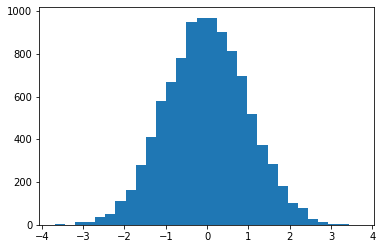

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
b = np.random.randn(10000)
# vous avez une gaussienne de moyenne 0 et d'écart-type 1
plt.hist(b, bins=30)

## correction

### modifier la gaussienne

Une solution avec `putmask`

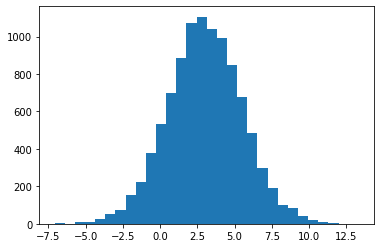

In [46]:
b = np.random.randn(10000)*np.sqrt(6.25)+3
plt.hist(b, bins=30);

In [47]:
np.putmask(b, (b < -5) | (b > 10), 3)

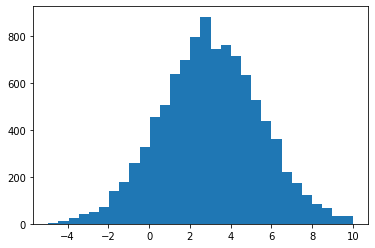

In [48]:
plt.hist(b, bins=30);